In [1]:
using PyPlot

In [40]:
function KalmanFilter(y::Vector{Float64}, P::Matrix{Float64}, x::Vector{Float64}, u::Vector{Float64},
    A::Matrix{Float64}, B::Matrix{Float64}, H::Matrix{Float64}, Q::Matrix{Float64}, R::Matrix{Float64})
    Ht = transpose(H)
    At = transpose(A)
    yhat = A * y + B * u
    Phat = A * P * At + Q
    K    = Phat * Ht * inv(H * Phat * Ht + R)
    ynew = yhat + K * (x - H * yhat)
    Pnew = (eye(size(K)[1]) - K * H) * Phat
    return (ynew, Pnew)
end

KalmanFilter (generic function with 2 methods)

### Canon Ball

In [2]:
function UpdateCanonBall(state)
    vx = state[2]
    x  = state[1] + vx
    vy = state[4] + gravity * dt
    y  = state[3] + vy
    if y < 0 # hitting the ground
        y = 0
    end
    return [x, vx, y, vy]
end

UpdateCanonBall (generic function with 1 method)

In [3]:
α = 45.0/180.0 * π
iv = 100
gravity = -9.81
p = [0, 0]
state = [0, iv * cos(α), 0, iv*sin(α)]
dt = 0.1;

In [4]:
states = zeros(144,4)
for i = 1:144
    state = UpdateCanonBall(state)
    states[i,:] = state
end

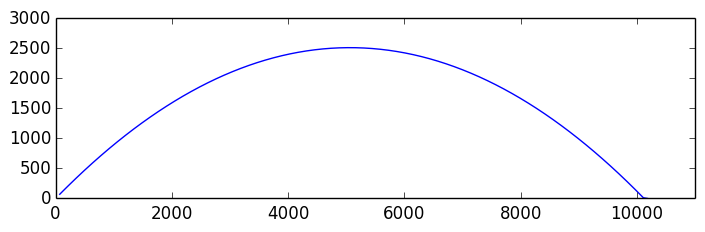

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320e4c990>

In [5]:
figure(figsize=(11*0.75,3*0.75))
xlim([0,11000])
plot(states[:,1], states[:,3])

#### Noisy Canon

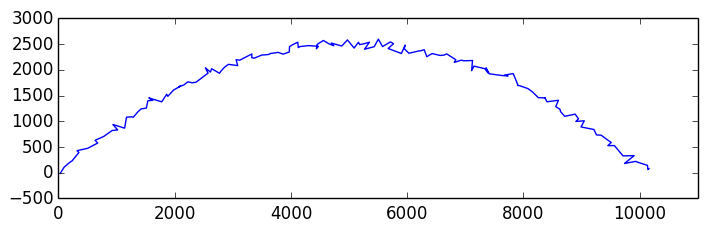

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321a87a10>

In [19]:
noisy_states = zeros(144,4)
for i = 1:144
    noisy_states[i,1] = states[i,1] + randn() * 50
    noisy_states[i,2] = states[i,2]
    noisy_states[i,3] = states[i,3] + randn() * 50
    noisy_states[i,4] = states[i,4]
end
figure(figsize=(11*0.75,3*0.75))
xlim([0,11000])
plot(noisy_states[:,1], noisy_states[:,3])

#### Applying the Kalman Filter

In [20]:
A = [
    [1.0  dt   0.0  0.0];
    [0.0  1.0  0.0  0.0];
    [0.0  0.0  1.0  dt];
    [0.0  0.0  0.0  1.0]
    ];

B = [
    [0.0  0.0  0.0  0.0];
    [0.0  0.0  0.0  0.0];
    [0.0  0.0  1.0  0.0];
    [0.0  0.0  0.0  1.0]
    ];

u = [
   0,
   0,
   0.5*gravity*dt*dt,
   gravity*dt
    ];

H = eye(4);
P = eye(4);

R = eye(4)*0.2;
Q = eye(4)*0.1;

y = [1500.0, 70.0, 500.0, 50.0]; 

In [21]:
estimated_states = zeros(144,4)
for i = 1:144
    x = squeeze(noisy_states[i,:],1)
    y, P = KalmanFilter(y, P, x, u, A, B, H, Q, R);
    estimated_states[i,:] = y;
end

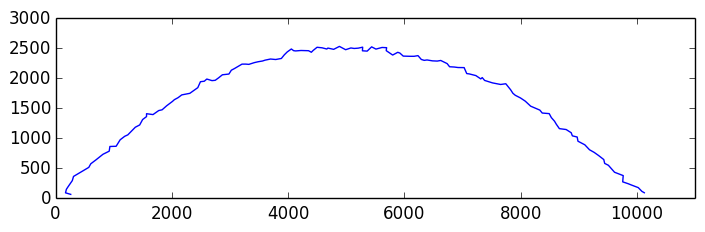

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321be4190>

In [22]:
figure(figsize=(11*0.75,3*0.75))
xlim([0,11000])
plot(estimated_states[:,1], estimated_states[:,3])

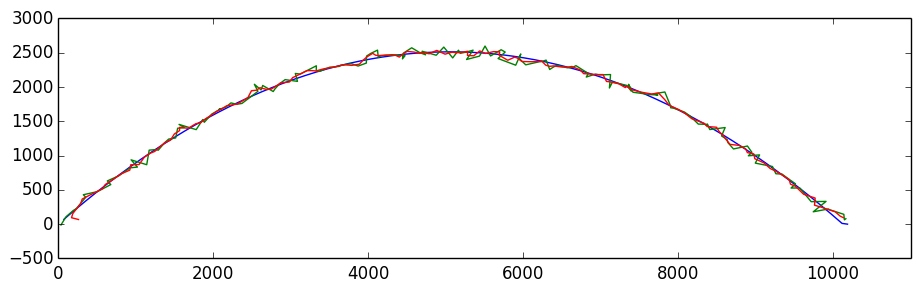

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321d323d0>

In [23]:
figure(figsize=(11,3))
xlim([0,11000])

plot(states[:,1], states[:,3])
plot(noisy_states[:,1], noisy_states[:,3])
plot(estimated_states[:,1], estimated_states[:,3])